First, we import the necessary Python libraries for our analysis.

pandas is used for data manipulation and analysis.

matplotlib.pyplot and seaborn are used for data visualization.


In [1]:
# Import necessary libraries for data manipulation, plotting, and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset from the CSV file into a pandas DataFrame
df = pd.read_csv('transaction_data.csv')

In [6]:
# Convert the 'Timestamp' column from a string (object) to a proper datetime format.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Use a regular expression with 'str.extract' to parse the Geolocation string
df[['Latitude', 'Longitude']] = df['Geolocation (Latitude/Longitude)'].str.extract(r'([-\d\.]+) N, ([-\d\.]+) W')

# Convert the new 'Latitude' and 'Longitude' columns to a numeric type (float)
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

# Drop the original 'Geolocation (Latitude/Longitude)' column
df = df.drop(columns=['Geolocation (Latitude/Longitude)'])

# Display the first 5 rows of the cleaned DataFrame to verify our transformations.
print("--- Cleaned Data Head ---")
df.head()


--- Cleaned Data Head ---


,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Device Used,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),PIN Code,Latitude,Longitude
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,2025-01-17 10:14:00,Failed,True,Desktop,Slice3,10,179,3075,34.0522,-74.0060
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,Mobile,Slice2,11,89,2369,35.6895,-118.2437
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,Mobile,Slice1,4,53,8039,48.8566,2.3522
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,2025-01-17 10:56:00,Success,True,Mobile,Slice3,10,127,6374,34.0522,-74.0060
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,2025-01-17 10:25:00,Success,True,Mobile,Slice3,20,191,8375,55.7558,37.6173


In [3]:
# Generate descriptive statistics for all numerical columns.
print("--- Descriptive Statistics for Numerical Columns ---")
df.describe()

--- Descriptive Statistics for Numerical Columns ---


,Transaction Amount,Latency (ms),Slice Bandwidth (Mbps),PIN Code
count,1000.00000,1000.000000,1000.00000,1000.00000
mean,771.16529,11.688000,148.51100,5458.66600
std,411.01925,5.131958,57.78634,2603.03646
min,51.89000,3.000000,50.00000,1000.00000
25%,423.34750,7.000000,98.00000,3281.75000
50%,761.65500,12.000000,148.00000,5385.50000
75%,1122.67250,16.000000,198.25000,7535.00000
max,1497.76000,20.000000,250.00000,9999.00000


In [4]:
# Print the counts of each unique value for key categorical columns.
print("--- Value Counts for Categorical Columns ---")
print("\nTransaction Type Counts:")
print(df['Transaction Type'].value_counts())
print("\nTransaction Status Counts:")
print(df['Transaction Status'].value_counts())
print("\nFraud Flag Counts:")
print(df['Fraud Flag'].value_counts())
print("\nDevice Used Counts:")
print(df['Device Used'].value_counts())
print("\nNetwork Slice ID Counts:")
print(df['Network Slice ID'].value_counts())

--- Value Counts for Categorical Columns ---

Transaction Type Counts:
Transaction Type
Transfer      374
Deposit       316
Withdrawal    310
Name: count, dtype: int64

Transaction Status Counts:
Transaction Status
Failed     513
Success    487
Name: count, dtype: int64

Fraud Flag Counts:
Fraud Flag
False    519
True     481
Name: count, dtype: int64

Device Used Counts:
Device Used
Mobile     521
Desktop    479
Name: count, dtype: int64

Network Slice ID Counts:
Network Slice ID
Slice2    340
Slice3    337
Slice1    323
Name: count, dtype: int64


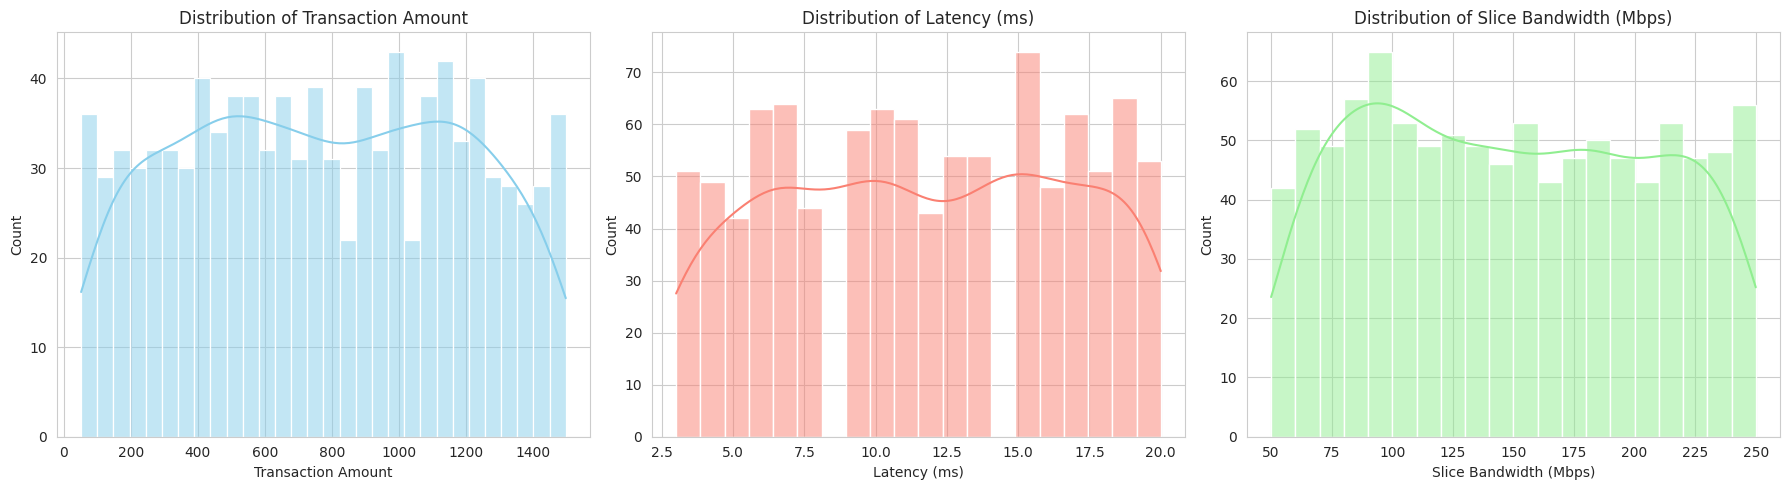

In [5]:
# Set a consistent, visually appealing style for all our plots.
sns.set_style("whitegrid")

# Create a figure to hold multiple subplots
plt.figure(figsize=(18, 5))

# Subplot 1: Histogram for Transaction Amount
plt.subplot(1, 3, 1)
sns.histplot(df['Transaction Amount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Transaction Amount')

# Subplot 2: Histogram for Latency
plt.subplot(1, 3, 2)
sns.histplot(df['Latency (ms)'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Latency (ms)')

# Subplot 3: Histogram for Slice Bandwidth
plt.subplot(1, 3, 3)
sns.histplot(df['Slice Bandwidth (Mbps)'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Slice Bandwidth (Mbps)')

plt.tight_layout()
plt.show()

/tmp/ipython-input-13-678353858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transaction Type', data=df, order=df['Transaction Type'].value_counts().index, palette='viridis')
/tmp/ipython-input-13-678353858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transaction Status', data=df, order=df['Transaction Status'].value_counts().index, palette='plasma')
/tmp/ipython-input-13-678353858.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud Flag', data=df, palette='magma')
/tmp/ipython-input-13-678353858.py:22: F

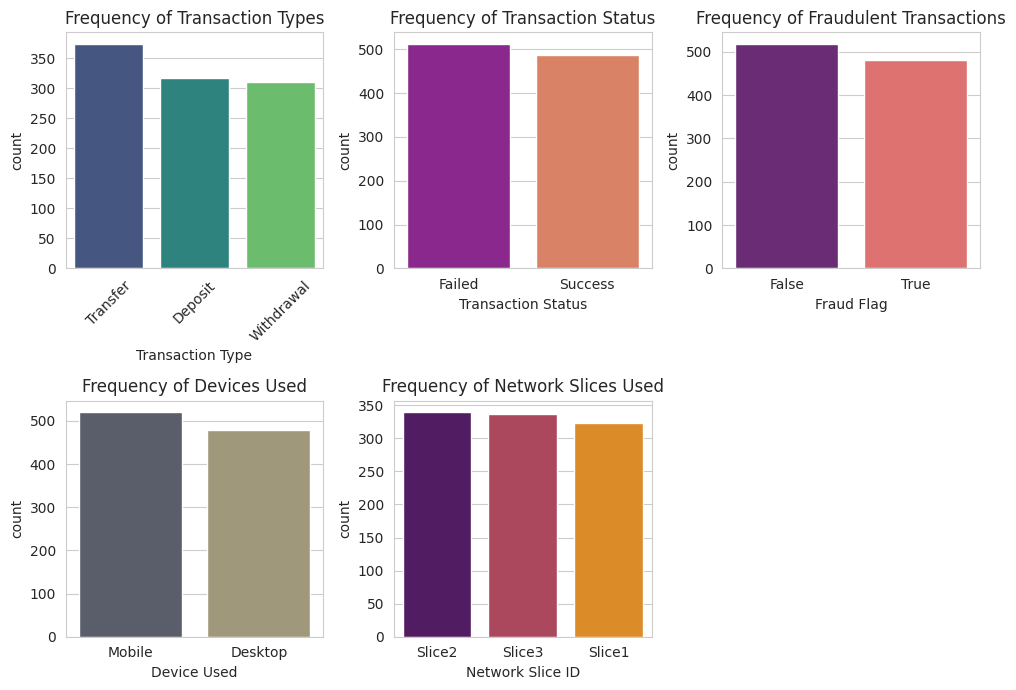

In [13]:
# Create a figure for the categorical feature plots
plt.figure(figsize=(10, 7))

# Subplot 1: Bar chart for Transaction Type
plt.subplot(2, 3, 1)
sns.countplot(x='Transaction Type', data=df, order=df['Transaction Type'].value_counts().index, palette='viridis')
plt.title('Frequency of Transaction Types')
plt.xticks(rotation=45)

# Subplot 2: Bar chart for Transaction Status
plt.subplot(2, 3, 2)
sns.countplot(x='Transaction Status', data=df, order=df['Transaction Status'].value_counts().index, palette='plasma')
plt.title('Frequency of Transaction Status')

# Subplot 3: Bar chart for Fraud Flag
plt.subplot(2, 3, 3)
sns.countplot(x='Fraud Flag', data=df, palette='magma')
plt.title('Frequency of Fraudulent Transactions')

# Subplot 4: Bar chart for Device Used
plt.subplot(2, 3, 4)
sns.countplot(x='Device Used', data=df, order=df['Device Used'].value_counts().index, palette='cividis')
plt.title('Frequency of Devices Used')

# Subplot 5: Bar chart for Network Slice ID
plt.subplot(2, 3, 5)
sns.countplot(x='Network Slice ID', data=df, order=df['Network Slice ID'].value_counts().index, palette='inferno')
plt.title('Frequency of Network Slices Used')

plt.tight_layout()
plt.show()


/tmp/ipython-input-12-1693689392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transaction Type', y='Transaction Amount', data=df, palette='pastel')
/tmp/ipython-input-12-1693689392.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Network Slice ID', y='Latency (ms)', data=df, palette='pastel')


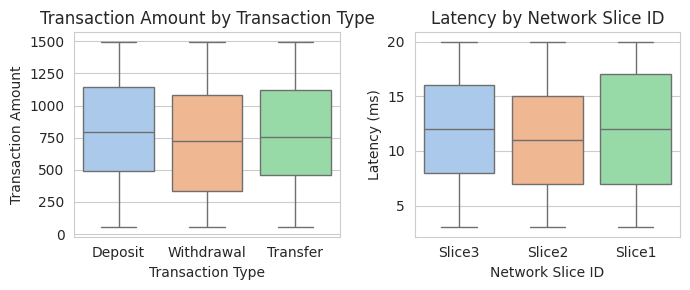

In [12]:
# Create a figure for the box plots
plt.figure(figsize=(7, 3))

# Subplot 1: Box plot to compare Transaction Amount across different Transaction Types
plt.subplot(1, 2, 1)
sns.boxplot(x='Transaction Type', y='Transaction Amount', data=df, palette='pastel')
plt.title('Transaction Amount by Transaction Type')

# Subplot 2: Box plot to compare Latency across different Network Slices
plt.subplot(1, 2, 2)
sns.boxplot(x='Network Slice ID', y='Latency (ms)', data=df, palette='pastel')
plt.title('Latency by Network Slice ID')

plt.tight_layout()
plt.show()


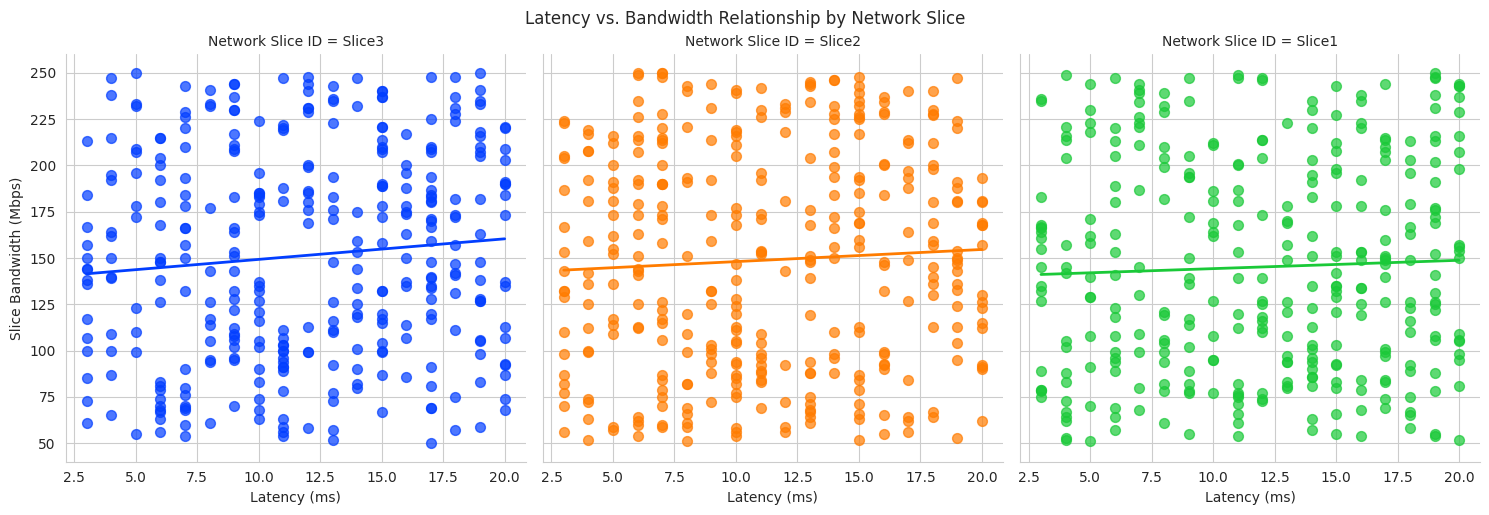

In [14]:
# Use lmplot to create a faceted scatter plot with regression lines.
# This creates a separate subplot for each 'Network Slice ID'.
# 'col="Network Slice ID"' creates the columns for each category.
# 'ci=None' turns off the confidence interval shading for a cleaner look.
sns.lmplot(
    x='Latency (ms)',
    y='Slice Bandwidth (Mbps)',
    hue='Network Slice ID',
    col='Network Slice ID',  # Create separate plots for each slice
    data=df,
    ci=None,
    palette='bright',
    height=5,
    scatter_kws={'s': 50, 'alpha': 0.7},
    line_kws={'lw': 2}
)
plt.suptitle('Latency vs. Bandwidth Relationship by Network Slice', y=1.02) # Add a main title
plt.show()


ValueError: Could not interpret value `Longitude` for `x`. An entry with this name does not appear in `data`.

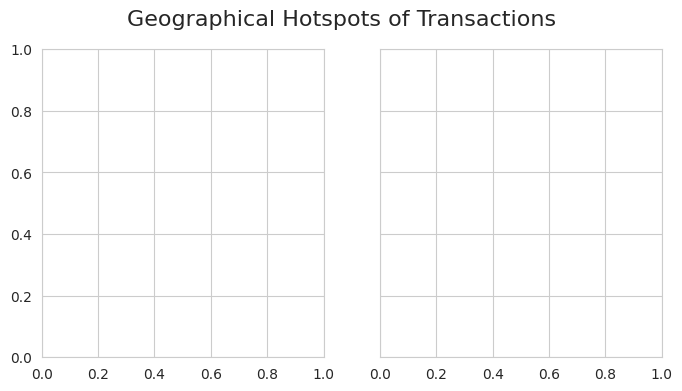

In [17]:
# Create a figure with two subplots, one for fraudulent and one for non-fraudulent transactions
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
fig.suptitle('Geographical Hotspots of Transactions', fontsize=16)

# Plot for Non-Fraudulent Transactions
sns.kdeplot(
    ax=axes[0],
    data=df[df['Fraud Flag'] == False],
    x='Longitude',
    y='Latitude',
    cmap='Blues', # Use a blue color map for legitimate transactions
    fill=True, # Fill the contours
    thresh=0.05
)
axes[0].set_title('Non-Fraudulent Transaction Hotspots', fontsize=14)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')


# Plot for Fraudulent Transactions
sns.kdeplot(
    ax=axes[1],
    data=df[df['Fraud Flag'] == True],
    x='Longitude',
    y='Latitude',
    cmap='Reds', # Use a red color map for fraudulent transactions
    fill=True,
    thresh=0.05
)
axes[1].set_title('Fraudulent Transaction Hotspots', fontsize=14)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')


plt.show()


Fraud Detention Model


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder


First, we load the data and perform the same initial cleaning steps as in our EDA notebook.


In [20]:
# Load the dataset
df = pd.read_csv('transaction_data.csv')

# --- Data Cleaning (from EDA) ---
# Convert Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Feature Engineering from Geolocation
df[['Latitude', 'Longitude']] = df['Geolocation (Latitude/Longitude)'].str.extract(r'([-\d\.]+) N, ([-\d\.]+) W')
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df = df.drop(columns=['Geolocation (Latitude/Longitude)'])

print("Data loaded and cleaned successfully.")
df.head()


Data loaded and cleaned successfully.


,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Device Used,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),PIN Code,Latitude,Longitude
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,2025-01-17 10:14:00,Failed,True,Desktop,Slice3,10,179,3075,34.0522,-74.0060
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,Mobile,Slice2,11,89,2369,35.6895,-118.2437
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,Mobile,Slice1,4,53,8039,48.8566,2.3522
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,2025-01-17 10:56:00,Success,True,Mobile,Slice3,10,127,6374,34.0522,-74.0060
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,2025-01-17 10:25:00,Success,True,Mobile,Slice3,20,191,8375,55.7558,37.6173


A machine learning model needs numerical input. We need to:

Select Features: Drop columns that are just identifiers and not predictive (like IDs) or are not suitable for direct use (like Timestamp).

Encode Categorical Variables: Convert categorical columns (like Transaction Type, Device Used) into numerical format using one-hot encoding. This creates new columns for each category, with a 1 or 0 value.

In [21]:
# Select the target variable
y = df['Fraud Flag']

# Select features for the model
# We drop identifier columns and the original timestamp
features = df.drop(columns=['Transaction ID', 'Sender Account ID', 'Receiver Account ID', 'PIN Code', 'Timestamp', 'Fraud Flag'])

# One-hot encode the categorical features
# This converts columns like 'Transaction Type' into numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns
features_encoded = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Display the first few rows of our final features
print("Shape of our features matrix:", features_encoded.shape)
print("\nFinal features for the model:")
features_encoded.head()


Shape of our features matrix: (1000, 11)

Final features for the model:


,Transaction Amount,Latency (ms),Slice Bandwidth (Mbps),Latitude,Longitude,Transaction Type_Transfer,Transaction Type_Withdrawal,Transaction Status_Success,Device Used_Mobile,Network Slice ID_Slice2,Network Slice ID_Slice3
0,495.90,10,179,34.0522,-74.0060,False,False,False,False,False,True
1,529.62,11,89,35.6895,-118.2437,False,True,True,True,True,False
2,862.47,4,53,48.8566,2.3522,False,True,False,True,False,False
3,1129.88,10,127,34.0522,-74.0060,True,False,True,True,False,True
4,933.24,20,191,55.7558,37.6173,False,False,True,True,False,True


We must split our data into a training set (which the model learns from) and a testing set (which we use to evaluate the model's performance on unseen data). This prevents the model from simply memorizing the answers.

In [22]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded,
    y,
    test_size=0.2,
    random_state=42,  # for reproducibility
    stratify=y # Ensures the train/test split has a similar ratio of fraud/non-fraud cases
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 800 samples
Testing set size: 200 samples


We will use a Random Forest Classifier. This is a powerful and widely-used model that is robust and generally provides high accuracy. It works by building a multitude of decision trees and outputting the class that is the mode of the classes of the individual trees.

In [23]:
# Initialize the Random Forest Classifier
# n_estimators is the number of trees in the forest
# random_state ensures that the results are reproducible
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Check the Out-of-Bag score (an internal validation score)
print(f"Out-of-Bag Score: {rf_classifier.oob_score_:.4f}")


Out-of-Bag Score: 0.5375


Now we evaluate our trained model on the unseen test data. We will look at:

Classification Report: Gives precision, recall, and f1-score.

Confusion Matrix: Shows exactly where the model made correct and incorrect predictions.

In [24]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print the classification report
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


--- Classification Report ---
              precision    recall  f1-score   support

       False       0.51      0.58      0.54       104
        True       0.47      0.41      0.44        96

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



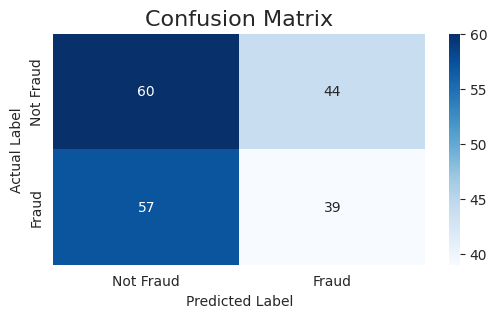

In [26]:
# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

The Receiver Operating Characteristic (ROC) curve is a fundamental tool for evaluating classification models. It shows the trade-off between the true positive rate (how many frauds we catch) and the false positive rate (how many legitimate transactions we wrongly flag). The Area Under the Curve (AUC) gives us a single number to summarize this performance. An AUC of 1.0 is a perfect model.

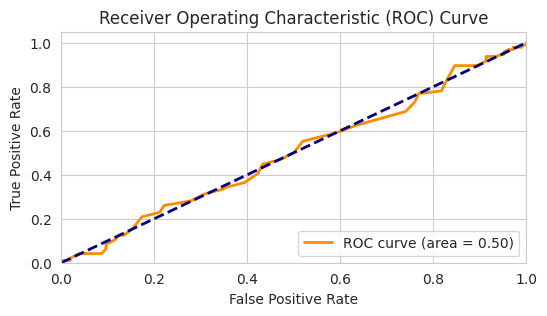

In [28]:
# Get prediction probabilities for the positive class (Fraud)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Dashed line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

A great advantage of Random Forest models is that they can tell us which features were most important for making predictions. This gives us incredible insight into what factors drive fraud in this dataset.

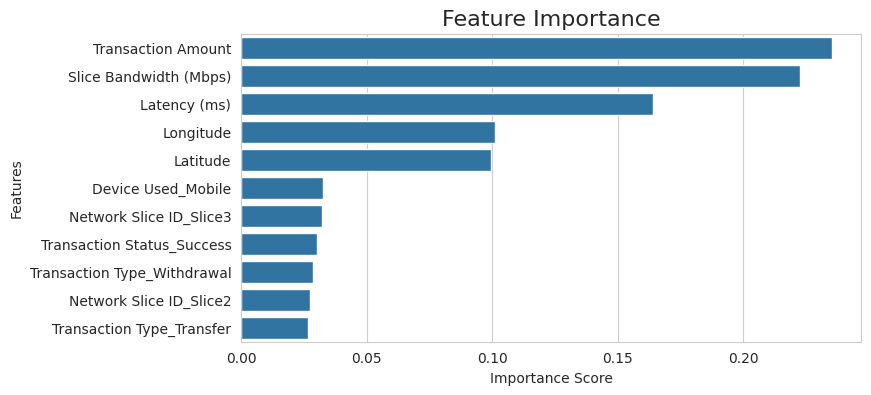

In [29]:
# Get feature importances from the trained model
importances = rf_classifier.feature_importances_
feature_names = features_encoded.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
